In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Proyecto IA-2')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto IA-2


# **General Libraries**

In [ ]:
#@title Libraries
!pip install sentiment-analysis-spanish
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
from textblob import TextBlob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy
import nltk
import re
from nltk.corpus import stopwords

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

     |████████████████████████████████| 30.0MB 149kB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import time
from datetime import datetime, date, timedelta

# For Twitter API extraction
import tweepy

# Tweet pre-processor
!pip install tweet-preprocessor
import preprocessor as p

# NLTK
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# TextBlob
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# **Twitter API - Tweepy Python Library**

Before get started, since we will be creating our own dataset to perform sentiment analysis on tweets from Spanish speakers, we will use a Python library called 'Tweepy' in order to retrieve the information. However, it is necessary to apply to a 'Twitter Developer Account' which is going to allow us to collect Twitter data.

Once you apply to the Twiiter Developer Account you'll be asked to give some information as follows:

![](https://drive.google.com/uc?export=view&id=1MkU6CS8R9s2A9EAnS4hzP850mzSPEmHj)

After submitting your application you will get an email from Twitter wheter asking you for more detailed information or giving you access to their API.

![](https://drive.google.com/uc?export=view&id=1Wv5W1wvqjd6KtwjFUkHcYlL_VNNsyjOX)

To make requests to the Twitter API you will need some keys that Twitter will give you once you get your developer account.

In [ ]:
# Christian's account

access_key = '925028500569980928-iHn6RLYzFQus8QK523nxMFbulVuHSXe'
access_secret = 'MA74CitviUidzm2i3kR9q4z62JqvN7R5qj7KQqf8M77y8'
consumer_key = 'QfMxZBmmdJUDVaY38FrkoSTI6'
consumer_secret = '1EuKbw7YWskIHXtckvY0fHHTZuvP4vChIAprvvTjt20SpPcJ9h'

In [ ]:
# Fredy's account

#access_key = '1355622603222888448-44TyVYyqLpwr3rflbC5xqB74rlIan7'
#access_secret = 'BYN5oDsvShLqKbW1xHfiKHdYrIfqWrkB8eJp0wDCGQqQY'
#consumer_key = 'DXp7BoQFiwzDj71NakP25aAmA'
#consumer_secret = 'Q9vDQsERDeUS00aYzsEykmHYaSxjS19TtposPfDzBOTwjC9Jhd'

In [ ]:
# Complete authorization and initialize API endpoint
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Christian

# Define the search term and the date_since date as variables
search_words = '(vacuna covid OR Colombia) OR (#YoNoMeVacuno) OR (#YoMeVacuno) OR (efectos secundarios vacuna) -filter:retweets'
# OR (#VacunaAdultosMayores) OR (#vacunacioncovid19) OR (#VacunaCOVID19) \ OR (#VacunasYA) OR (#VacunasCOVID19)
date_since = "2021-01-01"

In [ ]:
# Fredy

# Define the search term and the date_since date as variables
#search_words = '(vacuna covid OR Colombia) OR (#YoNoMeVacuno) OR (#YoMeVacuno) OR (efectos secundarios vacuna) -filter:retweets'
# OR (#VacunaAdultosMayores) OR (#vacunacioncovid19) OR (#VacunaCOVID19) \ OR (#VacunasYA) OR (#VacunasCOVID19)
#date_since = "2021-01-01"

# Get tweets

In [ ]:
# Generate list of dates (7 days window) based on today's date
list_of_dates = []
today = date.today()
for i in range(-7,1):
    target_date = (today + timedelta(days=i)).strftime("%Y-%m-%d")
    list_of_dates.append(target_date)

In [ ]:
def get_tweets(search_term , num_tweets, list_of_dicts):
    
    for end_date in list_of_dates:
        start_date = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=1)).strftime("%Y-%m-%d") # Create 1-day windows for extraction
        tweet_count = len(list_of_dicts)

        for tweet in tweepy.Cursor(api.search,
                                   q=f'{search_term} since:{start_date} until:{end_date}',
                                   lang = 'es',
                                   count = num_tweets,
                                   tweet_mode = 'extended').items(num_tweets):
            if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
                if tweet.lang == "es":
                    tweet_dict = {}
                    tweet_dict['username'] = tweet.user.name
                    tweet_dict['location'] = tweet.user.location
                    tweet_dict['text'] = tweet.full_text 
                    tweet_dict['hashtags'] = tweet.entities['hashtags']
                    tweet_dict['tweet_date'] = tweet.created_at
                    list_of_dicts.append(tweet_dict)
                    tweet_count +=1
                

In [ ]:
list_of_dicts_positive = []
search_term_positive = '#YoMeVacuno'
num_tweets = 100
get_tweets(search_term_positive, num_tweets, list_of_dicts_positive)

In [ ]:
list_of_dicts_positive = list_of_dicts_positive[:100]
len(list_of_dicts_positive)

100

In [ ]:
list_of_dicts_negative = []
search_term_negative = '#YoNoMeVacuno'
num_tweets = 100
get_tweets(search_term_negative, num_tweets, list_of_dicts_negative)


In [ ]:
list_of_dicts_negative = list_of_dicts_negative[:100]
len(list_of_dicts_negative)

100

In [ ]:
tweets = list_of_dicts_positive + list_of_dicts_negative
sentiment = []
for i in range(200):
  if i <= 100:
    sentiment.append(1)
  else:
    sentiment.append(0)

## Tweets dataset

In [ ]:
tweets_df = pd.DataFrame(tweets)
tweets_df.sort_values(by='tweet_date').reset_index(drop=True)
tweets_df["sentiment"] = sentiment

In [ ]:
tweets_df = tweets_df[(tweets_df['text'].str.contains("vac")) 
                            | (tweets_df['text'].str.contains("Vac"))]

tweets_df.tail()                    

,username,location,text,hashtags,tweet_date,sentiment
195,Campesino Wallmapu,Cunco,"""Hemos descubierto q el mayor número de víctim...","[{'text': 'GenocidioMundial', 'indices': [218,...",2021-02-10 21:51:50,0
196,Nosotros Somos las Noticias /,Chile,No pierdas el tiempo con este tipo de personas...,"[{'text': 'PrensaBasura', 'indices': [66, 79]}...",2021-02-10 21:36:20,0
197,King Cruyff,Barcelona,@soy_trincaista TELEDIARIO 4:\n#COVID19 NO ES ...,"[{'text': 'COVID19', 'indices': [30, 38]}, {'t...",2021-02-10 21:32:47,0
198,Campesino Wallmapu,Cunco,Conspiranoicos no mas...que no creen en la pla...,"[{'text': 'GenocidioMundial', 'indices': [79, ...",2021-02-10 21:29:40,0
199,Pancho_WHO,Gallifrey,Hace tiempo esta mas que claro que Medico es s...,"[{'text': 'Plandemia', 'indices': [161, 171]},...",2021-02-10 21:23:55,0


# **NATURAL LANGUAGE PROCESSING (NLP)**

Normally any NLP task involves the following text cleaning techniques:


*   Removal of HTML tags (e.g., '< br>').
*   Removal of punctuations and special characters (e.g., '\t', '\n').
*   Removal of 'stopwords' which do not give us much information (e.g., 'is', 'are', 'we').
*   Stemming / Lemmatization to bring multiple forms of a same word back into their common root (e.g., playing, plays, played into 'play').
*   Word vectorization or Word Embeddings which is the process of converting words into numbers.
*   Fit the data to the ML model.

## **Data Cleanse**

First, let's make a copy of the tweets to make the text processing.

In [ ]:
tweets_copia =  tweets_df['text'].values

### **Removing Punctuations and Special Characters**

As we can see, people use to attach links to their tweets as well as pound signs or hashtags ('#') and at signs ('@'). So, let's clean that up using 'Regular Expressions'.

In [ ]:
#@title **Cleanse Functions**

# Removes links and @ signs
def cleanText(txt):
  return re.sub('([^0-9A-Za-zñÑáéíóúÁÉÍÓÚ \t])|(\w+:\/\/\S+)', '', txt)

# Removes Punctuation including # signs and emojis
# def remove_punctuation(txt):
#   return re.sub(r'[^\w\s]', ' ', txt)

# Removes extra spaces
def remove_extra_spaces(txt):
  return re.sub(' +', ' ', txt)

In [ ]:
tweets_copia = np.array([cleanText(tweet) for tweet in tweets_copia])
tweets_copia[:10]

array(['Mí tía favorita lista con la segunda dosis  YoMeVacuno',
       'Ministro Paris destacó exitosa jornada de vacunación 174588 nuevos inoculados CooperativaEnCasa YoMeVacuno  ',
       'YoMeVacuno Médico colegiado ahora deberás actualizar tus datos y empadronarte para la vacunación contra el Covid19Solo deberás ingresar a CMP DigitalCMP LasVacunasSonSeguras LasVacunasSalvanVidas VacunaCOVID19 Coronavirus SistemaDeSaludAhora ',
       'Hoy conociendo y apoyando el programa yomevacuno de nuestro Gobierno en mi querida altohospicio muchos recuerdos y un gusto andar por ahí noscuidamosentretodos gobiernodechile ministeriodesalud ',
       'Este miércoles 10 de febrero tenemos una nueva jornada de vacunación a partir de las 900 en nuestro Espacio Esperanza para adultos mayores de las siguientes edades YoMeVacuno  ',
       'Top story sanidadgob  CarolinaDarias confirma la distribución de más de 700000 dosis de VacunaCOVID19  a las Comunidades Autónomas CCAA esta semana YoMeVacuno   se

In [ ]:
tweets_copia = np.array([remove_extra_spaces(tweet) for tweet in tweets_copia])
tweets_copia[:10]

array(['Mí tía favorita lista con la segunda dosis YoMeVacuno',
       'Ministro Paris destacó exitosa jornada de vacunación 174588 nuevos inoculados CooperativaEnCasa YoMeVacuno ',
       'YoMeVacuno Médico colegiado ahora deberás actualizar tus datos y empadronarte para la vacunación contra el Covid19Solo deberás ingresar a CMP DigitalCMP LasVacunasSonSeguras LasVacunasSalvanVidas VacunaCOVID19 Coronavirus SistemaDeSaludAhora ',
       'Hoy conociendo y apoyando el programa yomevacuno de nuestro Gobierno en mi querida altohospicio muchos recuerdos y un gusto andar por ahí noscuidamosentretodos gobiernodechile ministeriodesalud ',
       'Este miércoles 10 de febrero tenemos una nueva jornada de vacunación a partir de las 900 en nuestro Espacio Esperanza para adultos mayores de las siguientes edades YoMeVacuno ',
       'Top story sanidadgob CarolinaDarias confirma la distribución de más de 700000 dosis de VacunaCOVID19 a las Comunidades Autónomas CCAA esta semana YoMeVacuno see more 

Since Python is case sensitive we're going to set everything to lowercase so that we will not have repeated words.

In [ ]:
tweets_copia = np.char.lower(tweets_copia)
tweets_copia[:10]

array(['mí tía favorita lista con la segunda dosis yomevacuno',
       'ministro paris destacó exitosa jornada de vacunación 174588 nuevos inoculados cooperativaencasa yomevacuno ',
       'yomevacuno médico colegiado ahora deberás actualizar tus datos y empadronarte para la vacunación contra el covid19solo deberás ingresar a cmp digitalcmp lasvacunassonseguras lasvacunassalvanvidas vacunacovid19 coronavirus sistemadesaludahora ',
       'hoy conociendo y apoyando el programa yomevacuno de nuestro gobierno en mi querida altohospicio muchos recuerdos y un gusto andar por ahí noscuidamosentretodos gobiernodechile ministeriodesalud ',
       'este miércoles 10 de febrero tenemos una nueva jornada de vacunación a partir de las 900 en nuestro espacio esperanza para adultos mayores de las siguientes edades yomevacuno ',
       'top story sanidadgob carolinadarias confirma la distribución de más de 700000 dosis de vacunacovid19 a las comunidades autónomas ccaa esta semana yomevacuno see more 

In [ ]:
tweets_df['text'] = tweets_copia
tweets_df.head(10)

,username,location,text,hashtags,tweet_date,sentiment
0,ManzanitaIrish🇨🇱,Colchagua Valley y el mundo,mí tía favorita lista con la segunda dosis yom...,"[{'text': 'YoMeVacuno', 'indices': [48, 59]}]",2021-02-08 23:55:30,1
1,Cooperativa,"Santiago, Chile",ministro paris destacó exitosa jornada de vacu...,"[{'text': 'CooperativaEnCasa', 'indices': [82,...",2021-02-08 23:51:48,1
2,Colegio Médico Perú,"Lima, Peru",yomevacuno médico colegiado ahora deberás actu...,"[{'text': 'YoMeVacuno', 'indices': [1, 12]}, {...",2021-02-08 23:44:38,1
3,Cesar Villanueva V.,"Iquique, Chile.",hoy conociendo y apoyando el programa yomevacu...,"[{'text': 'yomevacuno', 'indices': [38, 49]}, ...",2021-02-08 23:44:30,1
4,munilaflorida,La Florida,este miércoles 10 de febrero tenemos una nueva...,"[{'text': 'YoMeVacuno', 'indices': [167, 178]}]",2021-02-09 23:58:47,1
5,Soto pa los amigos,,top story sanidadgob carolinadarias confirma l...,"[{'text': 'VacunaCOVID19', 'indices': [95, 109...",2021-02-09 23:57:37,1
6,Francesca Parodi,"Bío-Bío, Chile",si es que cuando empujamos todos sacamos lo me...,"[{'text': 'YoMeVacuno', 'indices': [64, 75]}]",2021-02-09 23:56:51,1
7,Jhon Richard,Lima,rburhum hace años perú tuvo un récord en latin...,"[{'text': 'YomeVacuno', 'indices': [233, 244]}]",2021-02-09 23:56:27,1
8,El camino así es: Distancia / Mascarilla,"Lima, Peru",tu crees que tu primo el que comparte las cade...,"[{'text': 'VacunasCOVID19', 'indices': [194, 2...",2021-02-09 23:56:04,1
9,María Cristina Borsotto Voté Rechazo,"Puerto Varas, Chile",camilaemiliasv canicsal sebastianpinera yomeva...,"[{'text': 'YoMeVacuno', 'indices': [43, 54]}]",2021-02-09 23:55:12,1


Now let's print a tweet now that we've cleaned the text.

In [ ]:
tweets_df.text[0]

'mí tía favorita lista con la segunda dosis yomevacuno'

# Optional

## Add a sentiment target with some libraries

Here we have a problem, we need a column indicating the sentiment of each tweet. This is easily solved with popular libraries such as TextBlob or Vader, the drawback is that they work with English words, so the language is a challenge.

We have two ways to solve this problem, we can translate the tweets with a TextBlob function, or we can use a library specialized in sentiment analysis with Spanish words. The disadvantage of TextBlob is that it is not recommended to translate the tweet, because important information can be lost, translation errors, among others. The problem with the Spanish library is that the model it proposes is not as good as that of TextBlob, however, we will use both methods for the time being.


In [ ]:
tweets = data["tweet"].values

### TextBlob

In [ ]:
sentiment_valueBlobText = []

for tweet in tweets:
  analysis_es = TextBlob(tweet)
  analysis_en = analysis_es.translate(to = 'en')
  if analysis_en.polarity < -1/5:
    sentimiento = 0
  elif (analysis_en.polarity > -1/5)&(analysis_en.polarity < 1/5):
    sentimiento = 1
  else:
    sentimiento = 2
  sentiment_valueBlobText.append(sentimiento)

In [ ]:
dataBlobText = data.copy()
dataBlobText["sentiment_value"] = sentiment_valueBlobText
dataBlobText.head()

In [ ]:

w = Counter(sentiment_valueBlobText)
import matplotlib.pyplot as plt
plt.bar(w.keys(), w.values())
plt.show

### Library sentiment-spanish

In [ ]:
sentiment_valueSS = []

for tweet in tweets:
  sentimiento_ss = sentiment.sentiment(tweet)
  if sentimiento_ss < 1/100:
    sentimiento = 0
  else:
    sentimiento = 1
  sentiment_valueSS.append(sentimiento)

In [ ]:
print(tweets[1], sentiment.sentiment(tweets[1]))

preveniresvencer 14febetiqueta del día preveniresvencermippcivzlanicolasmadurocon la prevención y conciencia del pueblo junto a los tratamientos gratuitos y la vacuna sputnik v para los casos positivos de covid19 venezuela vencerá al coronavirus 0.09259922210231432


In [ ]:
dataSS = data.copy()
dataSS["sentiment_value"] = sentiment_valueSS
dataSS.head()

,tweet,location,sentiment_value
0,cómo se le iba pasar al viejillo rata la oport...,"Cd. Juarez, Chih. Mexico",0
1,preveniresvencer 14febetiqueta del día preveni...,,1
2,drvicoficial mi tía quiere que inyecte a mis a...,,1
3,violeta bermúdez y su gabinete ministerial pre...,,1
4,mxurueta lo leí por completo además de que yo ...,CDMX,0


In [ ]:
dataSS.to_csv('Data/datos_14-02-21.csv')

<function matplotlib.pyplot.show>

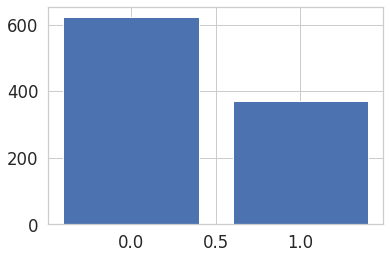

In [ ]:
from collections import Counter
w = Counter(sentiment_valueSS)
import matplotlib.pyplot as plt
plt.bar(w.keys(), w.values())
plt.show

### Split data

In order to do a more detailed analysis, we're going to plot the words frequency in all our tweets as we're doing more NLP tasks.

To achieve this, first we need to split every single tweet and store them in a new variable.

In [ ]:
words_in_tweet = [tweet.split() for tweet in tweets_copia]
words_in_tweet[0]

['cómo',
 'se',
 'le',
 'iba',
 'pasar',
 'al',
 'viejillo',
 'rata',
 'la',
 'oportunidad',
 'de',
 'otra',
 'manera',
 'para',
 'desaparecer',
 'dinero',
 'de',
 'las',
 'arcas',
 'de',
 'la',
 'naciónahora',
 'con',
 'la',
 'farsa',
 'q',
 'morena',
 'inventara',
 'una',
 'vacuna',
 'covid19',
 'y',
 'q',
 'van',
 'a',
 'necesitar',
 'una',
 'billonada',
 'de',
 'dinero',
 'en',
 'invistigacion',
 'y',
 'desarrollo']

Now using 'itertools' and 'collections' modules we can group all the words in the tweets and count them.

In [ ]:
# List of all words across tweets
all_words = list(itertools.chain(*words_in_tweet))

# Create counter
counts = collections.Counter(all_words)

counts.most_common(15) # Print 15 most common words

Let's now create a dataset with these values and do a bar plot so that we can see a better representation of the data.

In [ ]:
words_count = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

words_count.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
words_count.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Most Common Words Found in Tweets (Including All Words)")

plt.show()

### **Stopwords Removal**

We can see from the bar plot that the words with the highest frequency are not relevant words since don't give us any meaningful information. These are called 'stop words' and that's why we're going to remove them.

'nltk' package give us a list of stop words that we'll use to remove these empty words in our tweets.

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish')) # Set the language to Spanish

Let's see some of these words:

In [ ]:
# View a few words from the set
list(stop_words)[0:20]

As we can see, the nltk package offer us a Spanish set of words. However, they're clearly in Spanish from Spain, this could lead us to a less efficient stop words removal process.

Now let's print again a tweet before removing stopwords ir order to do a comparison after the process.

In [ ]:
words_in_tweet[0]

In [ ]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

Once we've remove the stopwords it is clear that the amount of words are considerably lower. This is going to help us doing a more meaningful and efficiency analysis. Now, let's count the words again and plot a frequency barplot.

In [ ]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

In [ ]:
words_count_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
words_count_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Most Common Words Found in Tweets (Without Stop Words)")

plt.show()

So now the highest frequency words seem to be 'more relevant' words than the one with the stop words.

### **Collections Words Removal**

Last but not least, we can remove the 'collection words' which in this case are words that we used to query our data from twitter, so we can expect these terms to appear in most of the tweets (e.g., #YoNoMeVacuno, #YoMeVacuno). Once we remove these terms, let's just repeat the whole process that we've been doing and see the final result.

In [ ]:
#Words that you used to query your data from Twitter, so you can expect that these terms will be found in each tweet. This could skew your word frequency analysis.
collection_words = ['yonomevacuno', 'yomevacuno', 'covid', 'covid19', '19']

In [ ]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [ ]:
tweets_nsw[0]

In [ ]:
tweets_nsw_nc[0]

In [ ]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

In [ ]:
words_count_nsw_nc = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
words_count_nsw_nc.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
words_count_nsw_nc.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

### **Stemming / Lemmatization**

Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word. 

Since most of the packages that exist for NLP tasks are focused on English, it may be hard to achieve tasks such as stemming or lemmatization. However, there's a package called 'Stanza' that give us tools to create NLP models in many languages.

We are going to use **Lemmatization** so that you can see how it works.

In [ ]:
pip install stanza

In [ ]:
import stanza
stanza.download('es', package='ancora', processors='tokenize,mwt,pos,lemma', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,mwt,pos,lemma', lang='es', use_gpu=True)

In [ ]:
tweets_nsw_nc[6]

In [ ]:
def join_string(list_string): 
  
    # Join the string based on '-' delimiter 
    string = ' '.join(list_string) 
      
    return string 

In [ ]:
rejoined_tweets =  [' '.join(tweet) for tweet in tweets_nsw_nc]
rejoined_tweets[6]

In [ ]:
processed_tweets = [stNLP(tweet) for tweet in rejoined_tweets]

In [ ]:
lemmatized_tweets = []
for t in processed_tweets:
  lemmatized_tweets.append([word.lemma for sent in t.sentences for word in sent.words])

In [ ]:
lemmatized_tweets[6]

In [ ]:
tweets_final =  [' '.join(tweet) for tweet in lemmatized_tweets]
tweets_final[6]

## **Word Vectorization**

# **RNN MODEL**

## First model - Without stop-words

In [ ]:
tweets_df.head(10)

,username,location,text,hashtags,tweet_date,sentiment
0,ManzanitaIrish🇨🇱,Colchagua Valley y el mundo,mí tía favorita lista con la segunda dosis yom...,"[{'text': 'YoMeVacuno', 'indices': [48, 59]}]",2021-02-08 23:55:30,1
1,Cooperativa,"Santiago, Chile",ministro paris destacó exitosa jornada de vacu...,"[{'text': 'CooperativaEnCasa', 'indices': [82,...",2021-02-08 23:51:48,1
2,Colegio Médico Perú,"Lima, Peru",yomevacuno médico colegiado ahora deberás actu...,"[{'text': 'YoMeVacuno', 'indices': [1, 12]}, {...",2021-02-08 23:44:38,1
3,Cesar Villanueva V.,"Iquique, Chile.",hoy conociendo y apoyando el programa yomevacu...,"[{'text': 'yomevacuno', 'indices': [38, 49]}, ...",2021-02-08 23:44:30,1
4,munilaflorida,La Florida,este miércoles 10 de febrero tenemos una nueva...,"[{'text': 'YoMeVacuno', 'indices': [167, 178]}]",2021-02-09 23:58:47,1
5,Soto pa los amigos,,top story sanidadgob carolinadarias confirma l...,"[{'text': 'VacunaCOVID19', 'indices': [95, 109...",2021-02-09 23:57:37,1
6,Francesca Parodi,"Bío-Bío, Chile",si es que cuando empujamos todos sacamos lo me...,"[{'text': 'YoMeVacuno', 'indices': [64, 75]}]",2021-02-09 23:56:51,1
7,Jhon Richard,Lima,rburhum hace años perú tuvo un récord en latin...,"[{'text': 'YomeVacuno', 'indices': [233, 244]}]",2021-02-09 23:56:27,1
8,El camino así es: Distancia / Mascarilla,"Lima, Peru",tu crees que tu primo el que comparte las cade...,"[{'text': 'VacunasCOVID19', 'indices': [194, 2...",2021-02-09 23:56:04,1
9,María Cristina Borsotto Voté Rechazo,"Puerto Varas, Chile",camilaemiliasv canicsal sebastianpinera yomeva...,"[{'text': 'YoMeVacuno', 'indices': [43, 54]}]",2021-02-09 23:55:12,1


In [ ]:
 #@title Test and train
 from sklearn.model_selection import train_test_split

 x_train, x_test, y_train, y_test = train_test_split(tweets_df['text'].values, tweets_df['sentiment'].values, test_size=0.3)

In [ ]:
#@title Tokenyzer and dictionary
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Tokenyze the sentences
max_vocab = 1000000
tokenizer = Tokenizer(num_words = max_vocab)
tokenizer.fit_on_texts(x_train)

#Lenght of our vocabulary
wordidx = tokenizer.word_index
v = len(wordidx)
print(v)

# Create dictionary
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print(train_seq[0])

1298
[308, 309, 310, 1, 14, 43, 311, 184, 312, 11, 21, 135, 313, 7, 2, 314, 315, 136, 316, 1, 317]


In [ ]:
#@title PAD the data
pad_train = pad_sequences(train_seq)
pad_test = pad_sequences(test_seq, maxlen=pad_train.shape[1])

In [ ]:
#@title Create the model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

D = 20
M = 15

i = Input (shape = (pad_train.shape[1],))
x = Embedding(v+1, D)(i)
x = LSTM(M, return_sequences = True)(x)
x = LSTM(M, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs = 100)

Epoch 1/100
5/5 [==============================] - 4s 228ms/step - loss: 0.6932 - accuracy: 0.4894 - val_loss: 0.6926 - val_accuracy: 0.5333
Epoch 2/100
5/5 [==============================] - 0s 43ms/step - loss: 0.6920 - accuracy: 0.6232 - val_loss: 0.6927 - val_accuracy: 0.4833
Epoch 3/100
5/5 [==============================] - 0s 43ms/step - loss: 0.6909 - accuracy: 0.5190 - val_loss: 0.6923 - val_accuracy: 0.4833
Epoch 4/100
5/5 [==============================] - 0s 46ms/step - loss: 0.6891 - accuracy: 0.5666 - val_loss: 0.6913 - val_accuracy: 0.5333
Epoch 5/100
5/5 [==============================] - 0s 43ms/step - loss: 0.6864 - accuracy: 0.6774 - val_loss: 0.6901 - val_accuracy: 0.5333
Epoch 6/100
5/5 [==============================] - 0s 43ms/step - loss: 0.6823 - accuracy: 0.7594 - val_loss: 0.6872 - val_accuracy: 0.7000
Epoch 7/100
5/5 [==============================] - 0s 43ms/step - loss: 0.6754 - accuracy: 0.9029 - val_loss: 0.6832 - val_accuracy: 0.6667
Epoch 8/100
5/5 [==

In [ ]:
modeloRNN_covid = r.model

modeloRNN_covid.save('Models/modelRNN_covid3.h5')

### Test

In [ ]:
def predict_sentiment(text):
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen = pad_train.shape[1])
  predicted_sentiment = model.predict(text_pad)
  print(predicted_sentiment, '\n')
  if predicted_sentiment < 0.5:
    print("Negativa")
  else:
    print("Positiva")

text = ["Estoy muy feliz por el acuerdo del gobierno con la vacuna, bien ahí"]
predict_sentiment(text)

[[0.99791247]] 

Positiva


In [ ]:
text = ["La vacuna no sirve para nada, no deberían contratar eso, es perder la plata"]
predict_sentiment(text)

[[0.01884878]] 

Negativa


In [ ]:
text = ["Yo digo que la vacuna es algo muy malo, jamás me la aplicaré"]
predict_sentiment(text)

[[0.00060377]] 

Negativa


In [ ]:
text = ["Por fin llegó la vacuna, estoy ansioso de aplicarla"]
predict_sentiment(text)

[[0.9932932]] 

Positiva


In [ ]:
text = ["No se vacunen, nos quieren meter un chip para controlarnos, no dejaré que me vacunen a mí ni a mis hijos, eso es malo"]
predict_sentiment(text)

[[0.00032052]] 

Negativa


In [ ]:
text = ["La vacuna la verdad es que me da igual, me gustaría y a la vez no aplicarla"]
predict_sentiment(text)

[[0.45416152]] 

Negativa
